In [1]:
# Import base dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in encoded RENTS data
data = pd.read_csv('../preProcessing/rents_encoded.csv', index_col=0)
data.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95838,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built,price
2318,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3.0,2.0,1043.0,1958.0,1650
2320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,1000.0,1950.0,1400
2321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,1.5,750.0,1972.0,1695
2322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,850.0,1972.0,1625
2323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.0,2.0,1100.0,1972.0,1625


In [3]:
print(list(data.columns))

['city_Antelope', 'city_Carmichael', 'city_Citrus Heights', 'city_Elk Grove', 'city_Fair Oaks', 'city_Folsom', 'city_Gold River', 'city_North Highlands', 'city_Orangevale', 'city_Rancho Cordova', 'city_Rio Linda', 'city_Sacramento', 'city_West Sacramento', 'city_Wilton', 'neighborhood_Alkali Flat', 'neighborhood_American River Canyon', 'neighborhood_American River Canyon North', 'neighborhood_Arcade Creek', 'neighborhood_Birdcage Heights', 'neighborhood_Boulevard Park', 'neighborhood_Broderrick/Bryte', 'neighborhood_Campus Commons', 'neighborhood_Cannon Industrial Park', 'neighborhood_Capital Village', 'neighborhood_Carelton Tract', 'neighborhood_Central Oak Park', 'neighborhood_Chase', 'neighborhood_College-Glen', 'neighborhood_Colonial Heights', 'neighborhood_Colonial Manor', 'neighborhood_Colonial Village', 'neighborhood_Cordova Lane', 'neighborhood_Cordova Meadows', 'neighborhood_Cordova Vineyards', 'neighborhood_Creekside', 'neighborhood_Curtis Park', 'neighborhood_Del Paso Height

In [4]:
data.shape

(1007, 228)

In [5]:
# Separate input and output data
X = data.iloc[:,:-1]
y = data['price'].values.reshape(-1,1)

In [6]:
# Split data for training and testing (85/15 split)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                        random_state=42,
                                                                        test_size=0.15)
X_train.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Elk Grove,city_Fair Oaks,city_Folsom,city_Gold River,city_North Highlands,city_Orangevale,city_Rancho Cordova,...,zipcode_95835,zipcode_95838,zipcode_95841,zipcode_95842,zipcode_95843,zipcode_95864,beds,baths,square_footage,year_built
3366,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,2.0,1688.0,1955.0
2715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.0,2.0,1344.0,1920.0
3092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,2.0,1100.0,1960.0
3491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,2.0,676.0,2008.0
3484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,2.5,1471.0,2011.0


In [7]:
# Create a StandardScaler to normalize our data
X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform data with the fitted scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Import ML dependencies
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [10]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [11]:
# Define our Sequential model and its parameters
def build_model():
  model = keras.Sequential([
    layers.Dense(60, activation='relu', input_shape=[len(X_train.columns)]),
    layers.Dense(38, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [12]:
# Create our model instance
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                13680     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                2318      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 16,799
Trainable params: 16,799
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train our model
EPOCHS = 1000

# Callback to stop the train early if value loss goes relatively unchanged over 'patience' epochs
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Save model outputs for analyzation
history = model.fit(
  X_train_scaled, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:3479149.0629,  mae:1724.2330,  mse:3479149.2500,  val_loss:3491899.3860,  val_mae:1696.5231,  val_mse:3491899.5000,  
....................................................................................................
Epoch: 100, loss:43414.7262,  mae:126.6587,  mse:43414.7227,  val_loss:507038.8461,  val_mae:384.8373,  val_mse:507038.8750,  
...................................

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
130,27794.264072,99.454041,27794.263672,509581.205592,381.889252,509581.18750,130
131,27348.013373,98.773964,27348.013672,515093.901499,385.444916,515093.90625,131
132,26967.629158,97.591423,26967.630859,520734.493238,390.881866,520734.50000,132
133,26262.018515,98.168594,26262.017578,530111.032712,391.241455,530111.00000,133
134,25850.109912,96.307648,25850.111328,530616.432749,397.026672,530616.43750,134


In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Price]')

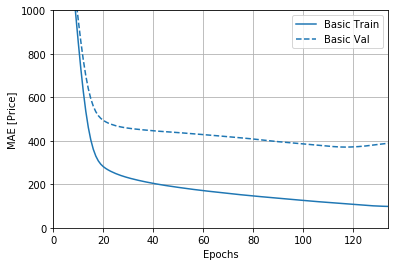

In [16]:
# Plot MAE of our 'price' modeling
import matplotlib.pyplot as plt

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 1000])
plt.ylabel('MAE [Price]')

Text(0, 0.5, 'MSE [Price^2]')

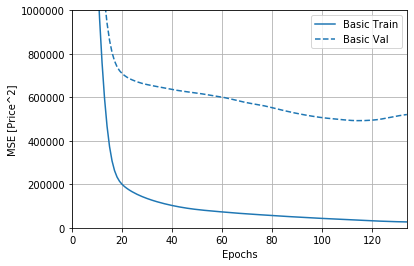

In [17]:
# Plot MSE of our 'price' modeling
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1000000])
plt.ylabel('MSE [Price^2]')

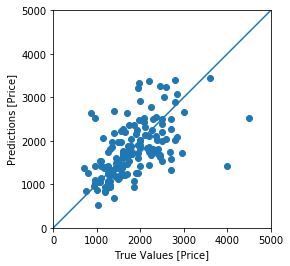

In [18]:
# Test our model using prediction and plot results against true values
test_predictions = model.predict(X_test_scaled).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 5000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [19]:
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=2)

152/1 - 0s - loss: 342280.4095 - mae: 419.6770 - mse: 344005.2188


In [20]:
# Save the model
model.save("test_model.h5")